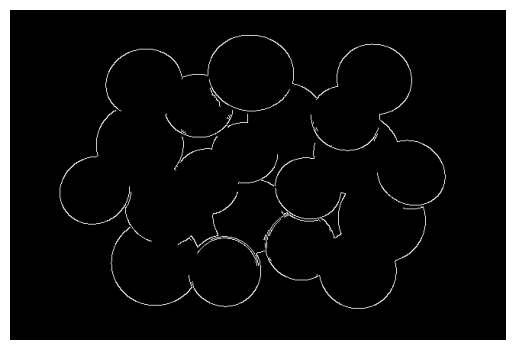

(<matplotlib.image.AxesImage at 0x7f98b83cff10>,
 (-0.5, 649.5, 432.5, -0.5),
 None)

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./img/coins5.jpg", cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(img, 450, 900)

# plt.figure(figsize=(20, 16))
plt.imshow(edges, "gray"), plt.axis("off"), plt.show()

(433, 650)
(1, 19, 3)
(433, 650, 3)


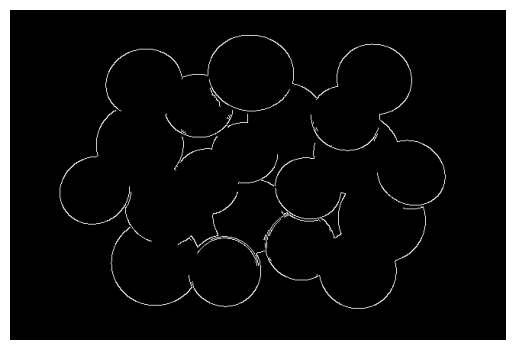

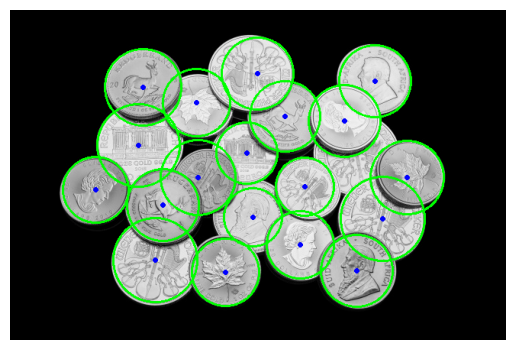

CPU times: user 258 ms, sys: 148 ms, total: 406 ms
Wall time: 128 ms


(<matplotlib.image.AxesImage at 0x7f989467b100>,
 (-0.5, 649.5, 432.5, -0.5),
 None)

In [17]:
%%time
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,  # 图像分辨率和累加器分辨率比
    minDist=50,  # 被检测的圆心之间的最小距离
    param1=130,  # 传递给canny中的较高的阈值,低阈值是高阈值的一半
    param2=70,  # 检测阶段圆心的投票阈值，越小，错误的圆越多
    minRadius=30,  # 最小圆半径
    maxRadius=100,  # 最大圆半径
)
print(img.shape)
print(circles.shape)
circles = np.uint16(np.around(circles))
img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img_c.shape)
for i in circles[0, :]:
    # print(i)
    # draw the outer circle
    cv2.circle(img_c, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(img_c, (i[0], i[1]), 2, (0, 0, 255), 2)

# plt.imshow(img, "gray"), plt.axis("off"), plt.show()
plt.imshow(edges, "gray"), plt.axis("off"), plt.show()
plt.imshow(img_c, "gray"), plt.axis("off"), plt.show()